In [1]:
import numpy as np
from scipy.linalg import lstsq, pinv, norm
from numpy.random import rand, randn, permutation
import matplotlib.pyplot as plt
%matplotlib inline

## Mean absolute error ###
Classic least-squares seeks to minimize the $\ell_2$-norm of the residual $r = Ax - b$.

This is not robust to outliers, so we instead use the formulation involving the $\ell_1$-norm, known as mean absolute error (MAE). 

$\min_{x \in R^D} ||Ax-b||_1$

In [2]:
def MAE_irls(A,b,xO,numIter):
# Solve the Mean Absolute Error minimization using majorize-minimize algorithm, 
# also known as iteratively reweighted least-squares (IRLS) .
# % Inputs:       A is a (N x D) matrix whose rows are the measurement locations         
# %               b is a vector of length N whose values are the measurement values
# %               x0 is random initialization vector
# %               
# % Outputs:      xhat is the vector of length D containing the approximate solution
    x = x0
    for ii in range(numIter):
        r = A@x - b
        W = np.diag(1/np.sqrt(2*np.abs(r[:,0])))
        x = lstsq(W@A,W@b)[0]
    return x

In [3]:
# Data initialization
N = 200

a, b = 10, 5
xx = rand(N,1)
zz = np.zeros((N,1))
k = N//2

# Outliers
randPerm = permutation(N)
outlierSubset = randPerm[:k]
zz[outlierSubset] = 1 # outliers

# Data w/ outliers
yy = (1-zz)*(a*xx + b + randn(N,1)) + zz*(20 - 20*xx + 10*randn(N,1))

A = np.append(xx, np.ones((N,1)),axis=1)

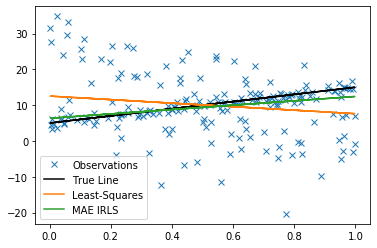

In [4]:
# Fit vanilla least squares
xxLS = lstsq(A,yy)[0]
yyLS = xxLS[0]*xx + xxLS[1]

# Fit MAE IRLS
numIter = 10
x0 = randn(2,1)
xHat = MAE_irls(A,yy,x0,numIter)
yyMAE = xHat[0]*xx + xHat[1]

# Plot results
plt.plot(xx,yy,'x', label='Observations')
plt.plot(xx,a*xx + b, 'k-',label='True Line')

plt.plot(xx,yyLS,label='Least-Squares')

plt.plot(xx,yyMAE,label='MAE IRLS')
plt.legend();

## $\ell_p$ regression ##
Implement iteratively reweighted least squares (IRLS) to directly minimize the $p$-norm of the residuals.

$\min_{x \in R^D} ||Ax-b||_p^p$

In [5]:
def LP_irls(A,b,p):   
# Solve the p-norm minimization using IRLS.
    # algorithm parameters
    tol = 1e-4
    maxIter = 1000
    xhat = pinv(A)@b

    for kk in range(maxIter):
        xprev = xhat
        e = A@xhat-b
        w = np.abs(e)**((p-2)/2)
        W = np.diag(w.squeeze())
        xhat = pinv(W@A)@(W@b);
        
        # stopping condition
        err = norm(xprev-xhat)/norm(xhat)
        if err < tol:
            break

    return xhat

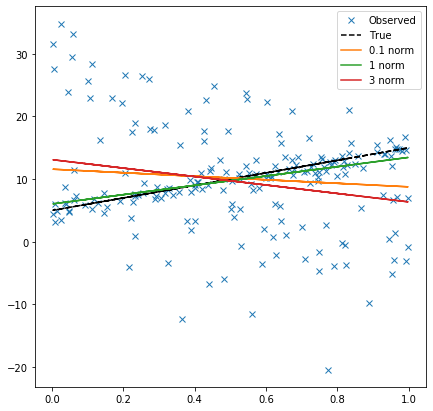

In [6]:
# % plot observed data and true line
plt.figure(figsize=(7,7))
plt.plot(xx,yy,'x',label='Observed')
plt.plot(xx,a*xx + b,'k--',label='True')

# %% Your code
# % Fit the data (xx,yy) using lp regression and plot for several values of p
A = np.append(xx, np.ones((N,1)),axis=1)
P = [0.1, 1, 3]
for p in P:
    xhat = LP_irls(A,yy,p)
    plt.plot(xx,xhat[0]*xx + xhat[1],label=str(p)+' norm')
plt.legend();